# Import Library


In [87]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset

In [88]:
data_moods = pd.read_csv('/content/data_moods.csv')
data_moods.head()

,name,album,artist,id,reledate,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happyase_
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


# Data Preprocessing

In [89]:
#Mengecek Missing Value
print("Missing values in dataset:")
print(data_moods.isnull().sum())

Missing values in dataset:
name                0
album               0
artist              0
id                  0
reledate            0
popularity          0
length              0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
valence             0
loudness            0
speechiness         0
tempo               0
key                 0
time_signature      0
mood                0
dtype: int64


In [90]:
# mengecek tipe data dari tiap kolom
data_moods.dtypes

,0
name,object
album,object
artist,object
id,object
reledate,object
popularity,int64
length,int64
danceability,float64
acousticness,float64
energy,float64


In [91]:
#Menampilkan semua kolom
data_moods.columns

Index(['name', 'album', 'artist', 'id', 'reledate', 'popularity', 'length',
       'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key',
       'time_signature', 'mood'],
      dtype='object')

In [92]:
# Menghapus kolom 'Wasting' dan 'loudness' dari dataset
stunting_data_cleaned = data_moods.drop(columns=['time_signature','loudness'])

# Menampilkan dataset setelah kolom dihapus
print(stunting_data_cleaned.head())

                                          name                        album  \
0                                         1999                         1999   
1                                           23                           23   
2                                     9 Crimes                            9   
3                               99 Luftballons               99 Luftballons   
4  A Boy Brushed Red Living In Black And White  They're Only Chasing Safety   

           artist                      id    reledate  popularity  length  \
0          Prince  2H7PHVdQ3mXqEHXcvclTB0  1982-10-27          68  379266   
1  Blonde Redhead  4HIwL9ii9CcXpTOTzMq0MP  2007-04-16          43  318800   
2     Damien Rice  5GZEeowhvSieFDiR8fQ2im  2006-11-06          60  217946   
3            Nena  6HA97v4wEGQ5TUClRM0XLc  1984-08-21           2  233000   
4       Underoath  47IWLfIKOKhFnz1FUEUIkE  2004-01-01          60  268000   

   danceability  acousticness  energy  instrumentalness  liven

In [93]:
#menampilkan informasi ringkas dalam semua dataset yang telah di perbaharui
data_moods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              686 non-null    object 
 1   album             686 non-null    object 
 2   artist            686 non-null    object 
 3   id                686 non-null    object 
 4   reledate          686 non-null    object 
 5   popularity        686 non-null    int64  
 6   length            686 non-null    int64  
 7   danceability      686 non-null    float64
 8   acousticness      686 non-null    float64
 9   energy            686 non-null    float64
 10  instrumentalness  686 non-null    float64
 11  liveness          686 non-null    float64
 12  valence           686 non-null    float64
 13  loudness          686 non-null    float64
 14  speechiness       686 non-null    float64
 15  tempo             686 non-null    float64
 16  key               686 non-null    int64  
 1

In [94]:
# Menghapus kolom 'Wasting' dan 'loudness' dari dataset
stunting_data_cleaned = data_moods.drop(columns=['time_signature','loudness'])

# Menampilkan dataset setelah kolom dihapus
print(stunting_data_cleaned.head())

                                          name                        album  \
0                                         1999                         1999   
1                                           23                           23   
2                                     9 Crimes                            9   
3                               99 Luftballons               99 Luftballons   
4  A Boy Brushed Red Living In Black And White  They're Only Chasing Safety   

           artist                      id    reledate  popularity  length  \
0          Prince  2H7PHVdQ3mXqEHXcvclTB0  1982-10-27          68  379266   
1  Blonde Redhead  4HIwL9ii9CcXpTOTzMq0MP  2007-04-16          43  318800   
2     Damien Rice  5GZEeowhvSieFDiR8fQ2im  2006-11-06          60  217946   
3            Nena  6HA97v4wEGQ5TUClRM0XLc  1984-08-21           2  233000   
4       Underoath  47IWLfIKOKhFnz1FUEUIkE  2004-01-01          60  268000   

   danceability  acousticness  energy  instrumentalness  liven

In [95]:
# Menampilkan value unik dari kolom tertentu dengan filter untuk 'data_moods'
columns_to_check = ['popularity', 'danceability', 'energy', 'valence', 'mood']

# Menggunakan DataFrame yang telah dimuat sebelumnya
for column in columns_to_check:
    print(f"Kolom: {column}")

    if column == 'mood':
        # Menampilkan nilai unik dari kolom 'mood'
        print(data_moods[column].unique())
    else:
        # Menampilkan nilai unik untuk kolom selain 'mood'
        print(data_moods[column].unique())

    print("-" * 30)


Kolom: popularity
[68 43 60  2 27 29  1  0 55 52 53 38 84 24 13 51 39 85 22 63 36 58 44 56
 75 48 26 57 30 34 50 31 72 32 37 46 20 61 71 42 66 79 74 45 41 77 40 62
  5  9 47 78 54 11 59 70 76 49 28 35 23 87 19 33 69 21 65  3 83 73 12  8
  7 64 67 82 25 80 18 17 14 15 88]
------------------------------
Kolom: danceability
[0.866  0.381  0.346  0.466  0.419  0.394  0.504  0.586  0.603  0.331
 0.349  0.532  0.382  0.543  0.671  0.456  0.492  0.402  0.279  0.494
 0.189  0.429  0.488  0.422  0.737  0.363  0.391  0.486  0.463  0.693
 0.313  0.664  0.388  0.613  0.694  0.696  0.535  0.265  0.396  0.497
 0.383  0.512  0.401  0.471  0.399  0.408  0.541  0.44   0.572  0.732
 0.531  0.321  0.459  0.666  0.387  0.868  0.171  0.769  0.235  0.476
 0.407  0.548  0.612  0.667  0.438  0.441  0.249  0.519  0.627  0.443
 0.446  0.775  0.537  0.621  0.45   0.552  0.663  0.736  0.31   0.554
 0.186  0.435  0.374  0.507  0.614  0.341  0.699  0.18   0.421  0.607
 0.351  0.431  0.941  0.619  0.567  0.305  0.19

In [96]:
# Mengambil data yang hanya memiliki mood tertentu
filtered_moods = ['Happy', 'Sad']  # Contoh filter mood
data_moods_cleaned = data_moods[data_moods['mood'].isin(filtered_moods)]

# Menggunakan fitur yang tersisa
X = data_moods_cleaned[['popularity', 'danceability', 'energy', 'valence']]  # Fitur numerik
y = data_moods_cleaned['mood']  # Target adalah kolom 'mood'

# Menampilkan informasi dataset yang telah difilter
print("Fitur (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())


Fitur (X):
    popularity  danceability  energy  valence
1           43         0.381   0.832    0.166
2           60         0.346   0.139    0.116
3            2         0.466   0.438    0.587
7            1         0.586   0.935    0.580
14          84         0.671   0.373    0.732

Target (y):
1       Sad
2       Sad
3     Happy
7     Happy
14    Happy
Name: mood, dtype: object


# Matriks Kolerasi

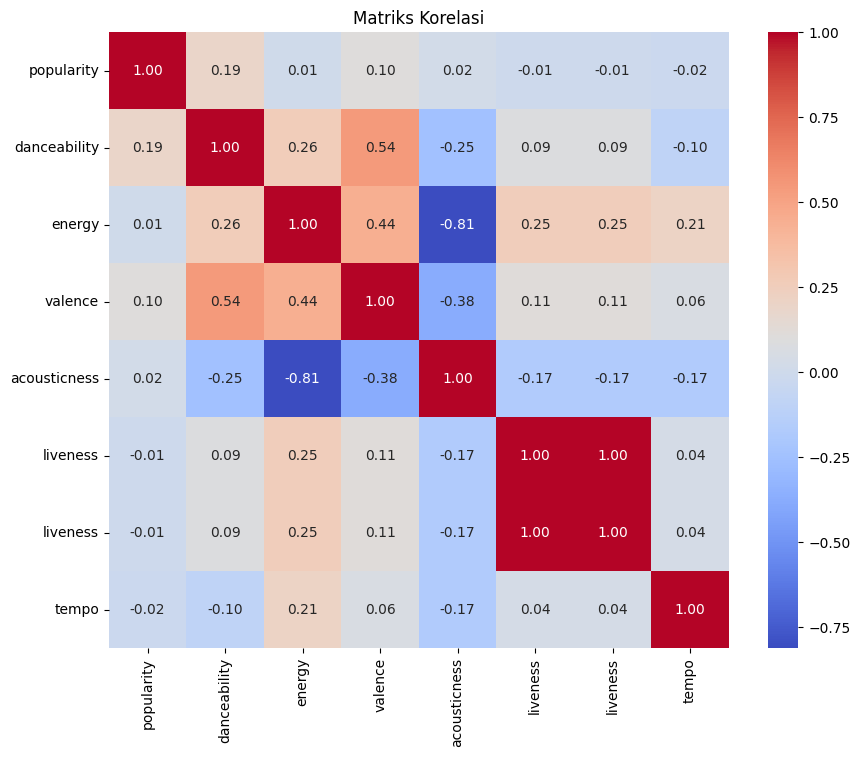

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung matriks korelasi untuk kolom numerik
numeric_columns = ['popularity', 'danceability', 'energy', 'valence', 'acousticness',
                   'liveness', 'liveness', 'tempo']
# Use data_moods_cleaned instead of data_moods_filtered
correlation_matrix = data_moods_cleaned[numeric_columns].corr()

# Buat heatmap
plt.figure(figsize=(10, 8))  # Atur ukuran figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

# EDA

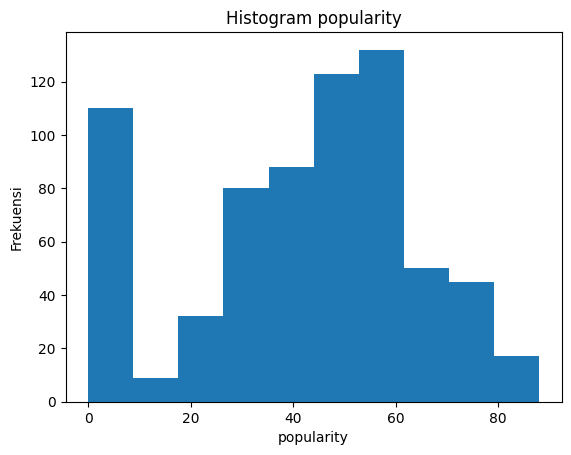

In [98]:
import matplotlib.pyplot as plt

# Pilih kolom yang divisualisasikan
kolom = 'popularity'
# Buat histogram
plt.hist(data_moods[kolom], bins=10) # Assuming 'age' is in 'data_moods'

# judul dan label sumbu
plt.title('Histogram ' + kolom)
plt.xlabel(kolom)
plt.ylabel('Frekuensi')

# Tampilkan histogram
plt.show()

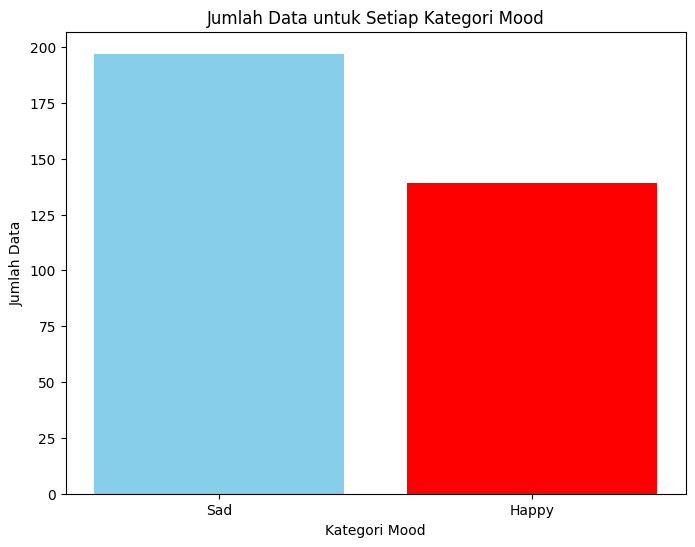

In [99]:
data_moods_filtered = data_moods_cleaned.copy()
# Hitung jumlah data untuk setiap kategori mood
mood_counts = data_moods_filtered['mood'].value_counts()

# Kategori dan jumlah data
categories = mood_counts.index
counts = mood_counts.values

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['skyblue', 'red'])
plt.title('Jumlah Data untuk Setiap Kategori Mood')
plt.xlabel('Kategori Mood')
plt.ylabel('Jumlah Data')

# If you have a label mapping, define it here. Otherwise, comment out or remove the next line.
# label_mapping = {'Happy': 'Senang', 'Sad': 'Sedih'} # Example mapping

# Menggunakan label asli atau label mapping jika tersedia
plt.xticks(categories, [cat for cat in categories]) # Using original labels as default
plt.show()

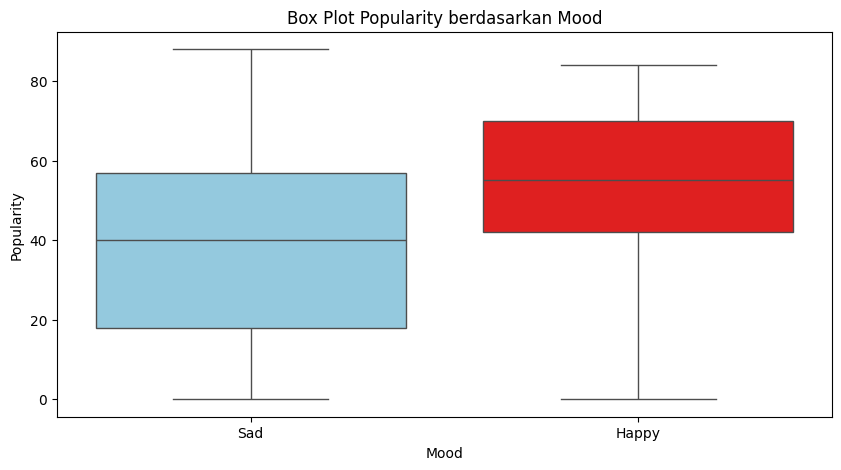

In [100]:
plt.figure(figsize=(10, 5))

# Box plot untuk 'popularity' berdasarkan 'mood' dengan penyesuaian hue
sns.boxplot(x='mood', y='popularity', data=data_moods_filtered, hue='mood', palette=['skyblue', 'red'])

plt.title('Box Plot Popularity berdasarkan Mood')
plt.xlabel('Mood')
plt.ylabel('Popularity')

# Tampilkan plot
plt.show()


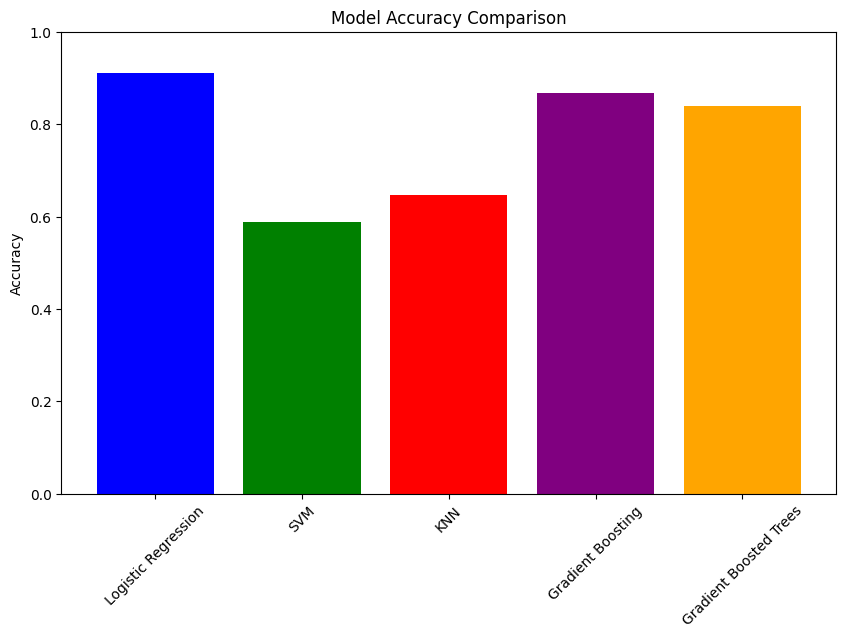

Logistic Regression:
  Accuracy: 0.91
  Precision: 0.91
  Recall: 0.91
  F1-Score: 0.91
--------------------------------------------------
SVM:
  Accuracy: 0.59
  Precision: 0.57
  Recall: 0.56
  F1-Score: 0.56
--------------------------------------------------
KNN:
  Accuracy: 0.65
  Precision: 0.64
  Recall: 0.64
  F1-Score: 0.64
--------------------------------------------------
Gradient Boosting:
  Accuracy: 0.87
  Precision: 0.86
  Recall: 0.87
  F1-Score: 0.87
--------------------------------------------------
Gradient Boosted Trees:
  Accuracy: 0.84
  Precision: 0.84
  Recall: 0.85
  F1-Score: 0.84
--------------------------------------------------


In [101]:
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Split dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Building
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Gradient Boosted Trees": HistGradientBoostingClassifier()
}

# Dictionary untuk menyimpan hasil
accuracies = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Melatih dan menguji model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Menghitung metrik
    accuracies[name] = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Simpan nilai precision, recall, f1-score untuk masing-masing model
    precision_scores[name] = report['macro avg']['precision']
    recall_scores[name] = report['macro avg']['recall']
    f1_scores[name] = report['macro avg']['f1-score']

# 4. Visualisasi Akurasi
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Print akurasi, precision, recall, f1-score untuk setiap model
for name in models.keys():
    print(f"{name}:")
    print(f"  Accuracy: {accuracies[name]:.2f}")
    print(f"  Precision: {precision_scores[name]:.2f}")
    print(f"  Recall: {recall_scores[name]:.2f}")
    print(f"  F1-Score: {f1_scores[name]:.2f}")
    print("-" * 50)


In [102]:
import joblib

# Simpan model Gradient Boosted Trees ke file
model_filename = "GradientBoostedTrees.pkl"
joblib.dump(models["Gradient Boosted Trees"], model_filename)
print(f"Model Gradient Boosted Trees berhasil disimpan ke file: {model_filename}")


Model Gradient Boosted Trees berhasil disimpan ke file: GradientBoostedTrees.pkl
